In [1]:
%reset -f
import sys
sys.path.insert(0, '..')
import wavhandler
import configs
import pandas as pd

In [2]:
# dc = configs.DatasetConfiguration(names=['Suzukii_RL','Pcfruit_sensor49','Rodrigo','LG'])
# dc.select_all()
# # dc.select(name='Suzukii_RL', species=['R','L'])
# # dc.select(name='Rodrigo', species='all')
# dc.read()
# df = pd.concat([dc.fnames, dc.labels], axis=1)
# df.columns = ['fnames','labels']
# df.loc[ df['labels'].isin(['R','L']), 'labels'] = 'D. suzukii'
# df.loc[ df['labels'].isin(['LG_drosophila_10_09']), 'labels'] = 'D. melanogaster'
# dc.parse_filenames(temp_humd=True)#, hist_temp=True, hist_humd=True, hist_date=True)
# print(f"dataframe info: \n{dc.df_info.head()}")
# print(f"value counts: \n{df.labels.value_counts()}")

In [3]:
dc = configs.DatasetConfiguration(names=['Flytrap'])

Dataset - Flytrap - exists: True


In [4]:
dc.select_all()
dc.read()

In [5]:
psdflt = wavhandler.make_df_parallel(names=dc.fnames.tolist(), setting='psdflt')
rawflt = wavhandler.make_df_parallel(names=dc.fnames.tolist(), setting='rawflt')

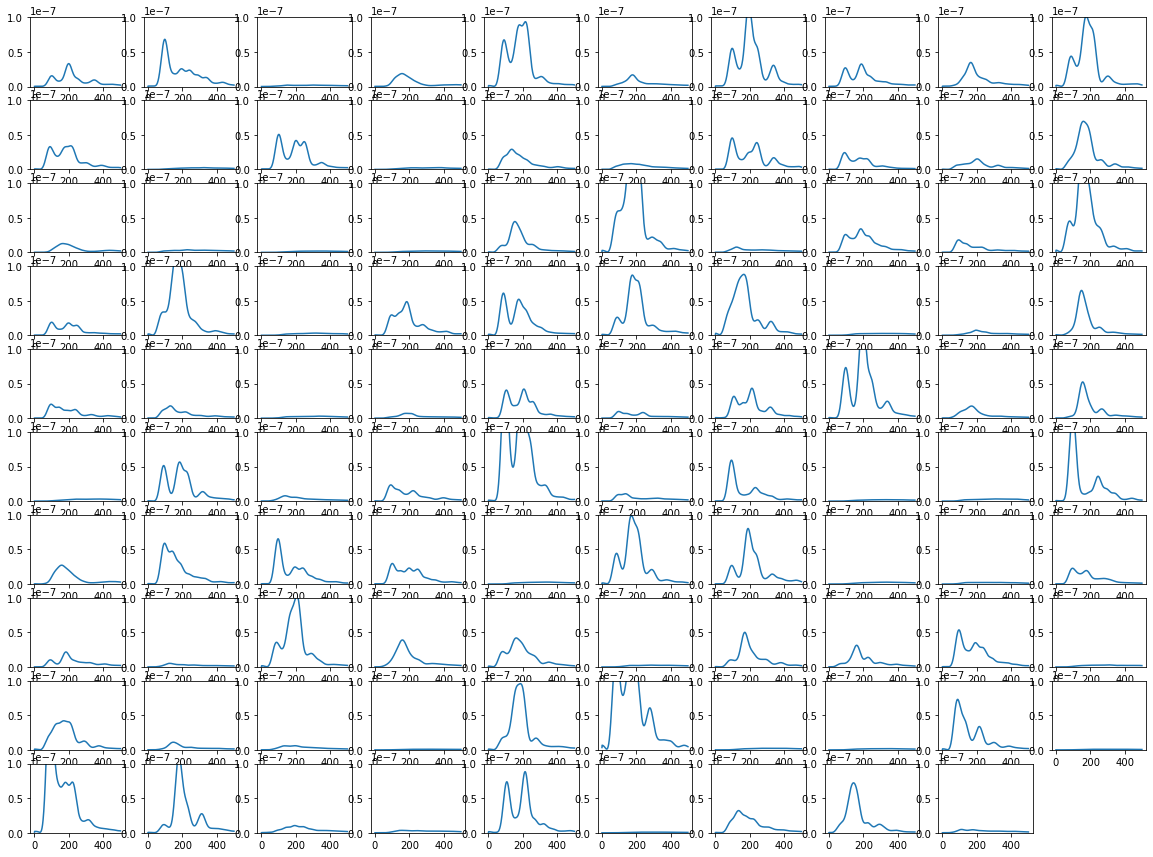

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.plot(psdflt.iloc[i][:500])
    plt.ylim(0, 1e-7)

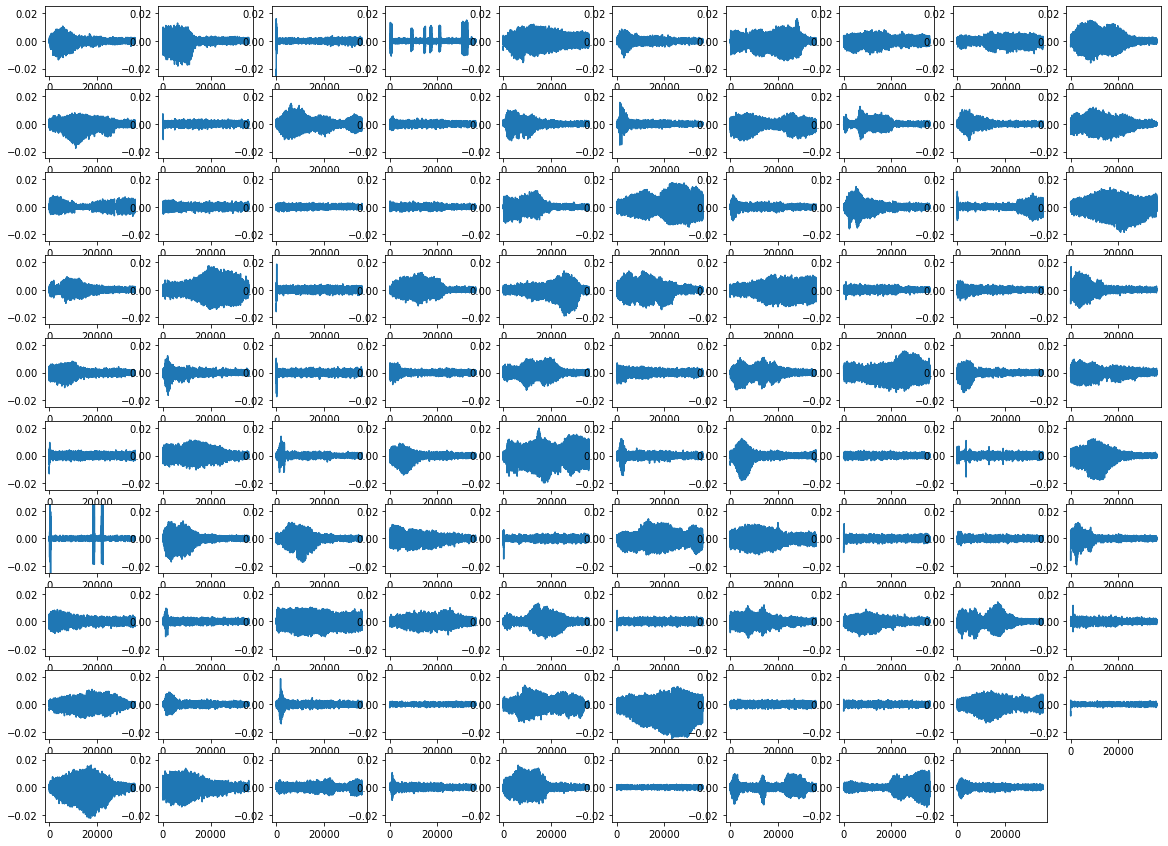

In [7]:
plt.figure(figsize=(20,15))
for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.plot(rawflt.iloc[i])
    plt.ylim(-.025,.025)

47.126725418160156


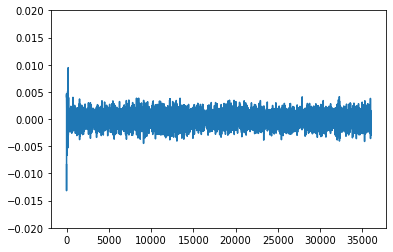

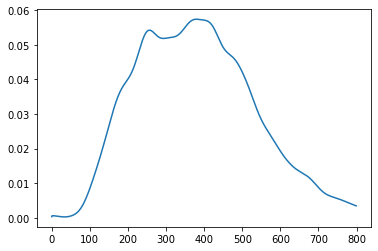

In [8]:
import numpy as np

rdm = np.random.randint(0, psdflt.shape[0])

# early = data.psd.iloc[rdm, 0:150].median()
# late = data.psd.iloc[rdm, 180:300].median()

import scipy.integrate as it
early = it.cumtrapz(psdflt.iloc[rdm, :90],initial=0)[-1]
late = it.cumtrapz(psdflt.iloc[rdm, 200:300],initial=0)[-1]
print(late/early)

plt.figure()
rawflt.iloc[rdm].plot(ylim=(-.02,.02))
plt.figure()
from sklearn.preprocessing import normalize
sig = psdflt.iloc[rdm,:].values.reshape(-1,1)
norm_sig = normalize(sig, norm='l2', axis=0)
plt.plot(norm_sig[:800])
# psdflt.iloc[rdm,:800].plot()

In [9]:
def filter_invalid(sig):
    import scipy.integrate as it
    early = it.cumtrapz(sig[:100],initial=0)[-1]
    late = it.cumtrapz(sig[200:300],initial=0)[-1]
    return late/early


In [50]:
inds = psdflt.T.apply(lambda x: filter_invalid(x)) < 2

In [51]:
newpsdflt = psdflt.reset_index(drop=True).loc[inds]
newrawflt = rawflt.reset_index(drop=True).loc[inds]

In [52]:
newpsdflt.shape

(31, 4097)

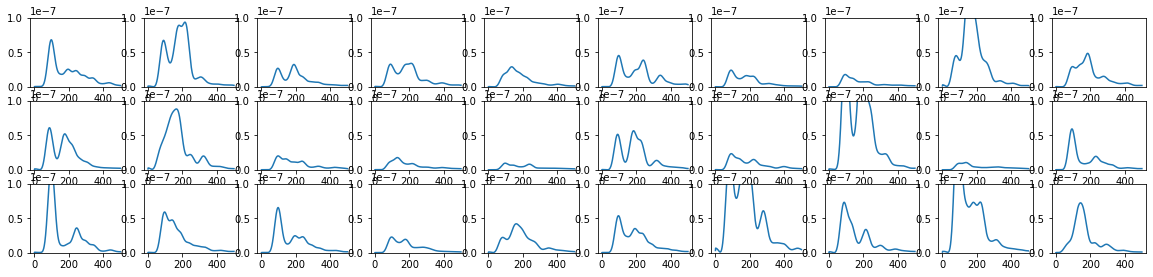

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(1, newpsdflt.shape[0]):
    plt.subplot(10, 10, i)
    plt.plot(newpsdflt.iloc[i][:500])
    plt.ylim(0, 1e-7)

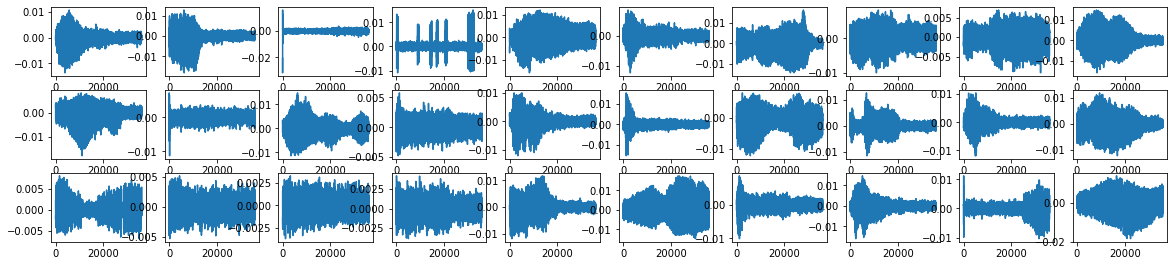

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(1, newpsdflt.shape[0]):
    plt.subplot(10, 10, i)
    plt.plot(rawflt.iloc[i])
#     plt.ylim(0, 1e-7)